# Dimensionality Reduction: Kernel PCA


In this notebook we will study **nonlinear dimensionality reduction**.

Previously we discussed the PCA algorithm that is a linear dimensionality reduction technique. It works well when the data is linearly separable. 

However, in the case of linearly non-separable data, a nonlinear technique is required for reducing the dimensionality of a dataset.

<img src="https://cse.unl.edu/~hasan/Pics/LinearVsNonlinear.png" width=600 height=300>

To perform complex nonlinear projections for dimensionality reduction we can use the **kernel trick** with the PCA algorithm. It is known as **Kernel PCA**.

Previously we studied the kernel trick in the context of Support Vector Machine. Kernel trick is a mathematical technique for implicitly mapping instances into a very high-dimensional space. It enables nonlinear classification and regression with Support Vector Machines. Recall that a linear decision boundary in the high-dimensional feature space corresponds to a complex non-linear decision boundary in the original space.

Kernel PCA is often good at **preserving clusters of instances after projection**, or sometimes even unrolling datasets that lie close to a twisted manifold.

A Kernel PCA model can be defined by using various types of kernel functions, such as polynomial, sigmoid, gaussian radial basis function, etc.

In this notebook we will explore the Gaussian Radial Basis Function (RBF) Kernel PCA algorithm.


## Gaussian Radial Basis Function (RBF) Kernel PCA

In the linear PCA approach, we are interested in the principal components that maximize the variance in the dataset. This is done by extracting the eigenvectors (principle components) that correspond to the largest eigenvalues based on the covariance matrix:

$Cov = \frac{1}{N}\sum \vec{x_i}.\vec{x_i}^T$

The Kernel PCA **generalize** this approach for data that is mapped onto the higher dimensional space via a kernel function:

$Cov = \frac{1}{N}\sum \phi(\vec{x_i}).\phi(\vec{x_i})^T$

However, in practice the the covariance matrix in the higher dimensional space is not calculated explicitly (kernel trick). 

Therefore, the implementation of RBF kernel PCA does not yield the principal component axes (in contrast to the standard PCA), but the obtained eigenvectors can be understood as projections of the data onto the principal components.


## Tasks

We use a non-linear dataset to study the effect of:
- Linear PCA
- Kernel PCA (Gaussian RBF)

We reduce the dimension of the non-linear dataset using these two techniques and then apply a linear classification algorithm (Linear Support Vector Machine).

Our goal is to see how the Kernel SVC transforms the non-linear data into a set of linearly separable instances such that a linear classifier can separate the data.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_circles

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, KernelPCA

from sklearn.svm import LinearSVC


# Synthetic Dataset

We will use Scikit-Learn's "datasets.make_circles" function to generate a synthetic non-linear dataset. It creates a large circle containing a smaller circle in 2d.

The following two parameters are used by the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 


We use the **matplotlib.pyplot.scatter** function which creates a scatter plot of y vs x with varying **marker size** and/or **color**.

The marker size and color are set by the parameters "s" and "c".

The color parameter "c" is assigned by "y" that represents the class labels. Thus, there would be two different colors (value of y) for this binary labeled dataset.


- c : color, sequence, or sequence of color, optional

        The marker color. Possible values:

            - A single color format string.
            - A sequence of color specifications of length n.
            - A sequence of n numbers to be mapped to colors using cmap and norm.
            - A 2-D array in which the rows are RGB or RGBA.
            
            
- s : scalar or array_like, shape (n, ), optional

        The marker size in points**2.

            
            
- cmap : Colormap, optional, default: None

        A Colormap instance or registered colormap name. cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.

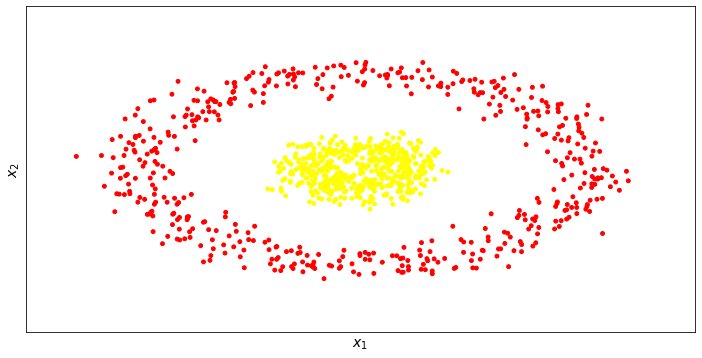

In [2]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='autumn')

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.5, 1.5, -1.7, 1.7])
plt.xticks(())
plt.yticks(())
plt.show()

## Linear PCA

We transform the non-linear dataset using Linear PCA.

Then, we display the transformed data:
- In 2D (using two principle axes)
- In 1D (using only one principle axis)

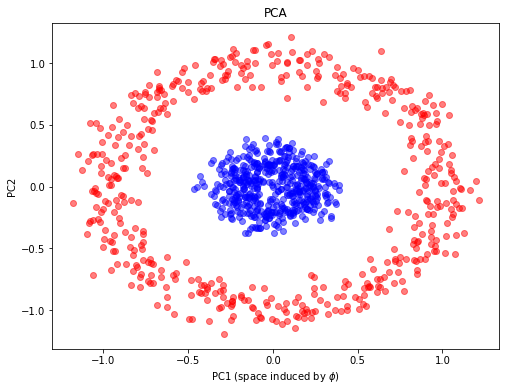

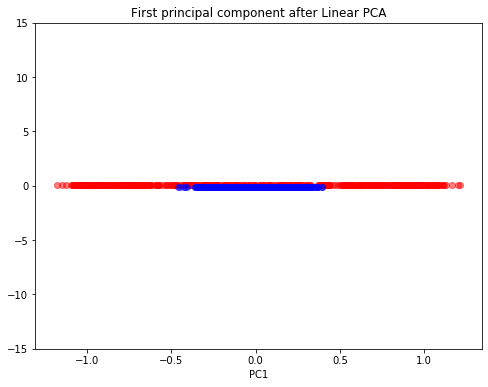

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = pca.transform(X_grid)[:, 0].reshape(X1.shape)
#plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure(figsize=(8,6))
plt.plot(X_pca[y==0, 0], X_pca[y==0, 1], "ro", alpha=0.5)
plt.plot(X_pca[y==1, 0], X_pca[y==1, 1], "bo", alpha=0.5)
plt.title("PCA")
plt.xlabel("PC1 (space induced by $\phi$)")
plt.ylabel("PC2")


plt.figure(figsize=(8,6))
plt.scatter(X_pca[y==0, 0], np.zeros((500,1))+0.1, color='red', alpha=0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((500,1))-0.1, color='blue', alpha=0.5)
plt.ylim([-15,15])
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

## Linear PCA: Observation

We observe that the linear PCA fails to give us a “good” representation of the data in 1D space. This is because the data (two concentric circles) is linearly non-separable.

The linear PCA approach does not produce a subspace where the 2 classes are linearly well separated.

Note that PCA is a unsupervised method and does not “consider” class labels in order to maximize the variance in contrast to Linear Discriminant Analysis. Here, the colors blue and red are just added for visualization purposes to indicate the degree of separation.

## Gaussian RBF kernel PCA

We will perform dimensionality reduction via RBF kernel PCA. 

Note that the choice of $\gamma$ depends on the dataset and should be obtained via hyperparameter tuning. 

We do not report the the hyperparameter tuning, instead use the optimal value of $\gamma$ obtained from tuning.

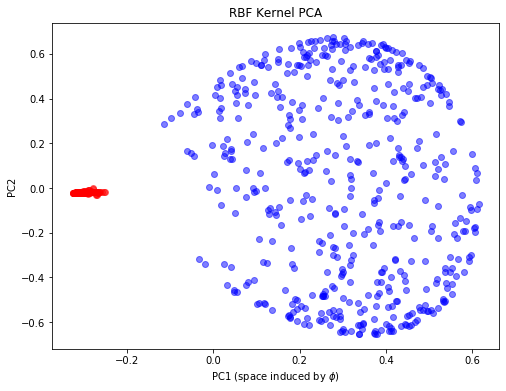

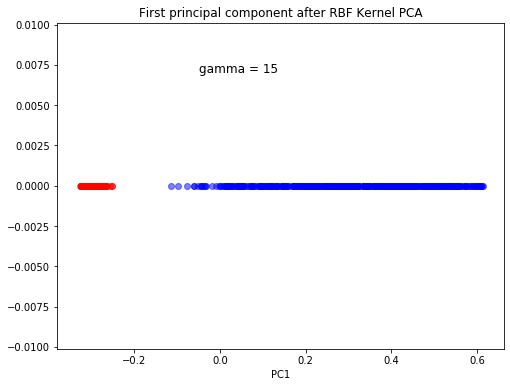

In [4]:
pca_rbf = KernelPCA(n_components=2, kernel="rbf", gamma=15, fit_inverse_transform=True)
X_pca_rbf = pca_rbf.fit_transform(X)


X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5), np.linspace(-1.5, 1.5))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = pca_rbf.transform(X_grid)[:, 0].reshape(X1.shape)
#plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.figure(figsize=(8,6))
plt.plot(X_pca_rbf[y==0, 0], X_pca_rbf[y==0, 1], "ro", alpha=0.5)
plt.plot(X_pca_rbf[y==1, 0], X_pca_rbf[y==1, 1], "bo", alpha=0.5)
plt.title("RBF Kernel PCA")
plt.xlabel("PC1 (space induced by $\phi$)")
plt.ylabel("PC2")

plt.figure(figsize=(8,6))
plt.scatter(X_pca_rbf[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_pca_rbf[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.text(-0.05, 0.007, 'gamma = 15', fontsize=12)
plt.title('First principal component after RBF Kernel PCA')
plt.xlabel('PC1')
plt.show()


## RBF Kernel PCA: Observation


We observe that the RBF Kernel PCA provides us a “good” representation of the data in 1D space. It creates a subspace where the classes are separated well. 

Such a subspace can then be used as input for linear classification models, such as Support Vector Machine.

## Apply a Linear Classifier on Two Transformed Dataset

We will classify the two transformed dataset using Linear Support Vector Machine (LinearSVC) which is a linear classifier. If the data is not linearly separable then the Linear SVC cannot classify the data accurately (unless we augment the data).


## Visualizing the Decision Boundary


To better understand how the Linear SVC classifier creates decision boundary, we need to **<font color=red size=6> visualize </font>** it.

We define the function "decision_boundary_svc_class_colored" to plot the decision boundary. 

In [5]:
def decision_boundary_svc_class_colored(clf, X, plotDistanceFromHyperplane=False, colorBar=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create a mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contour plot for the distance of all points from the hyperplane and the two margins
        plt.contour(x1, x2, y_decision, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='black')
        
        
        #plt.pcolormesh(x1, x2, -y_decision, cmap=plt.cm.RdBu)
        
        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(colorBar==True):
        plt.colorbar()   

## Classification using Linear SVC

We train two **Linear SVC** classifiers using sklearn's LinearSVC model by using the two transformed dataset (from linear PCA and RBF Kernel PCA).

Training Accuracy (PCA):  0.653
Training Accuracy (Kernel PCA):  1.0


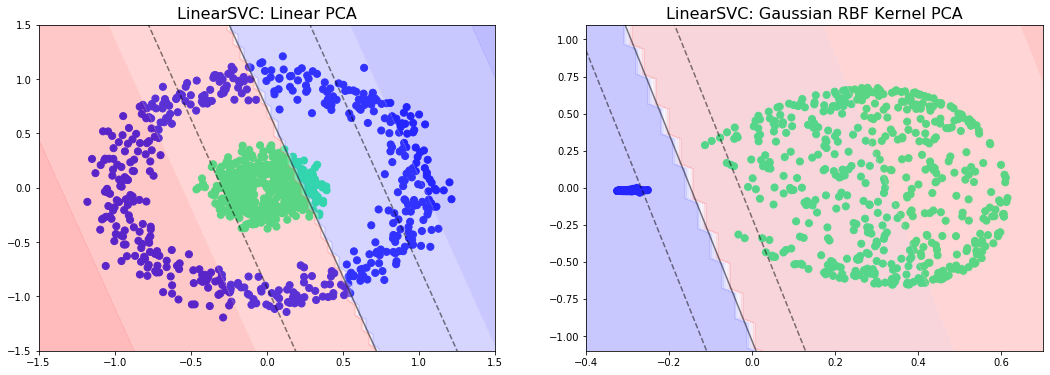

In [6]:
scaler = StandardScaler()

# Linear PCA

svm_pca = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=5000)

scaled_svm_pca = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_pca),
    ])

scaled_svm_pca.fit(X_pca, y)

y_predicted_pca = scaled_svm_pca.predict(X_pca)



# Kernel PCa (rbf)
svm_pca_rbf = LinearSVC(C=1, loss="hinge", random_state=42, max_iter=5000)

scaled_svm_pca_rbf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_pca_rbf),
    ])


scaled_svm_pca_rbf.fit(X_pca_rbf, y)

y_predicted_pca_rbf = scaled_svm_pca_rbf.predict(X_pca_rbf)


print("Training Accuracy (PCA): ", scaled_svm_pca.score(X_pca, y))
print("Training Accuracy (Kernel PCA): ", scaled_svm_pca_rbf.score(X_pca_rbf, y))



plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=50, cmap='winter')
decision_boundary_svc_class_colored(scaled_svm_pca, X_pca, plotDistanceFromHyperplane=True, colorBar=False)
plt.title("LinearSVC: Linear PCA", fontsize=16)
plt.axis([-1.5, 1.5, -1.5, 1.5])


plt.subplot(122)
plt.scatter(X_pca_rbf[:, 0], X_pca_rbf[:, 1], c=y, s=50, cmap='winter')
decision_boundary_svc_class_colored(scaled_svm_pca_rbf, X_pca_rbf, plotDistanceFromHyperplane=True, colorBar=False)
plt.title("LinearSVC: Gaussian RBF Kernel PCA", fontsize=16)
plt.axis([-0.4, 0.7, -1.1, 1.1])


plt.show()

## Observation: Linear PCA vs Gaussian RBF Kernel PCA

We observe that when the non-linear dataset is transformed by the Gaussian RBF Kernel PCA, it becomes linearly separable. As a consequence a Linear SVC classifier can classify the data with 100% accuracy.

However, another Linear SVC classifier that uses the transformed data from the linear PCA is unable to classify the data accurately.